# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

Importing the required libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [ ]:
# Shape of the dataset
df.shape 

(1898, 9)

There are 1898 rows and 9 columns in the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB



The data types are Integers, Objects and float. Therre are 4 integers, 4 objects/strings and one float/decimal. Although, the data type for rating is supposed to be an integer.

In [ ]:
# Missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

There are no missing values in the data.

In [ ]:
# Summary statistics of the numerical data
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


The minimum time it takes for food to be prepared is 20 minutes.
The average time it takes for food to be prepared is 27 minutes.
The maximum time it takes for food to be prepared is 35 minutes.

In [ ]:
df['rating'].value_counts(dropna = False)  

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

736 orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].unique()  

array([1477147, 1477685, 1477070, ..., 1477819, 1477513, 1478056])

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()  

1200

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique() 

178

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique() 

14

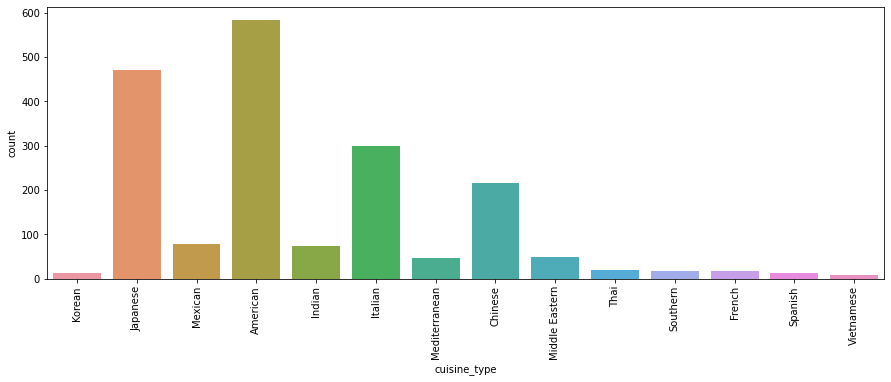

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type');
plt.xticks(rotation=90)
plt.show() 

1. American cuisines are the most purchased and most popular cuisine type while,vietnamese are the least purchased cuisine types
2. More customers prefer American, Japanese and Italian cuisines among other cuisine types.
3. The distribution is skewed to the right.

#### Cost of the order

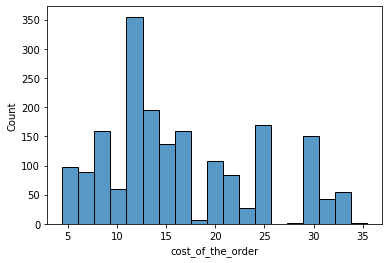

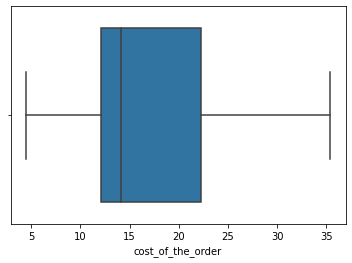

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 

1. The most frequently purchased cost of an order is 11 dollars
2. The cost of orders ranges between 4.470 and 35.410 dollars.
3. The distribution is skewed towards the right
4. The first 50% cost of order ranges between 4.410 and 14 dollars, while the next 25% cost of order ranges between 14 dollars and 22 dollars.

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].unique() 

array(['Weekend', 'Weekday'], dtype=object)

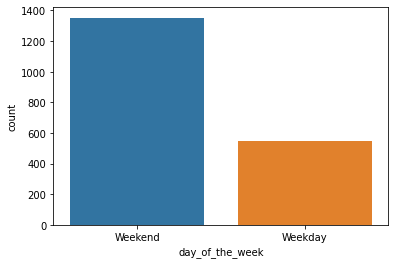

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week'); 

The restaurants get more orders during the weekends compared to the weekdays.

#### Rating

In [ ]:
# Check the unique values
df['rating'].unique() 

array(['Not given', '5', '3', '4'], dtype=object)

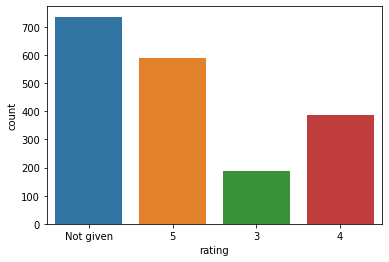

In [ ]:
sns.countplot(data = df, x = 'rating'); 

Out of the 1898 orders received, 736 orders were not rated.
588 orders were rated 5, 386 orders were rated 4 while 188 orders were rated 3.

#### Food Preparation time

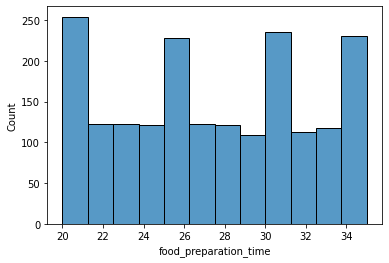

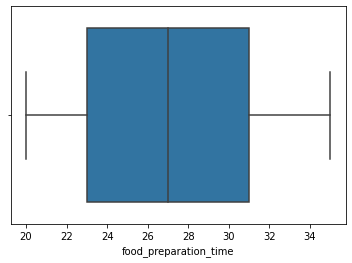

In [ ]:
sns.histplot(data=df,x='food_preparation_time') 
plt.show()
sns.boxplot(data=df,x='food_preparation_time') 
plt.show()

Food preparation time ranges between 20 to about 35 minutes. 
50% of the food preparation time is between 20 and 27 minutes, while the remaining 50% falls between 27 and 35 minutes; which makes it symmetrical.

#### Delivery time

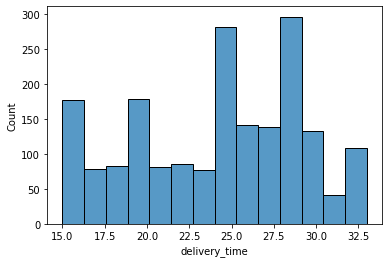

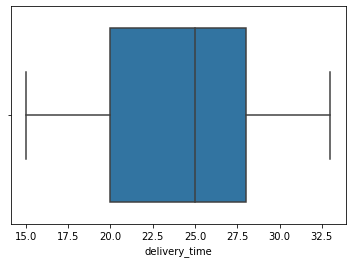

In [ ]:
sns.histplot(data=df,x='delivery_time') 
plt.show()
sns.boxplot(data=df,x='delivery_time') 
plt.show()

1. The delivery time spans between 15 minutes and 32.5 minutes.
2. 50% of order delivery time is within 15 and 25 minutes, while the other 50% falls within 25 and 32.5 minutes.
3. The distribution is left skewed and there are no outliers.

In [ ]:
# Top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts() 

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

## The top 5 restaurants in terms of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm restaurants.

In [ ]:
# Most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].unique() 

array(['Korean', 'Japanese', 'American', 'Italian', 'Mexican',
       'Mediterranean', 'Chinese', 'Indian', 'Thai', 'Southern', 'French',
       'Spanish', 'Middle Eastern', 'Vietnamese'], dtype=object)

In [ ]:
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

The most popular cuisines on weekends is the American cuisine with a value count of 415.

In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] 

# Total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


In [ ]:
# Mean delivery time
mean_del_time = df['delivery_time'].mean()  

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


In [ ]:
# Counts of  each customer_id
df['customer_id'].value_counts().head(3)  

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

### Multivariate Analysis

#### Cuisine vs Cost of the order

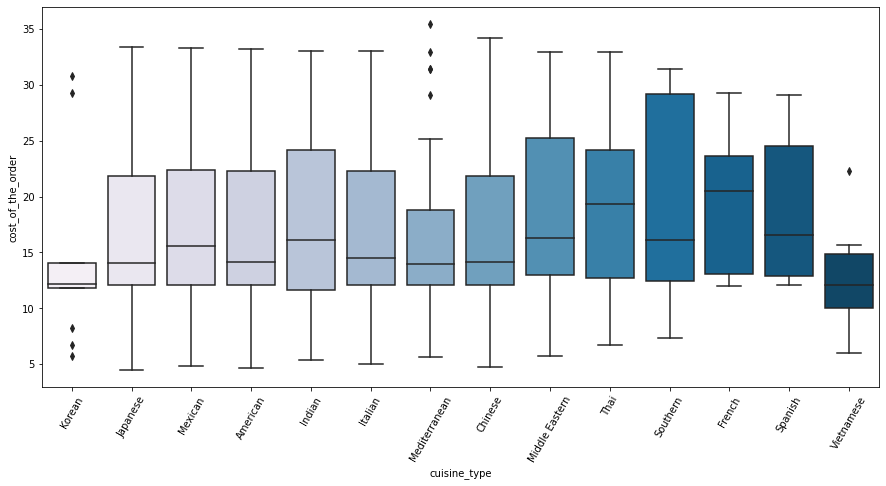

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

1. Mediterranean cuisines have the highest cost of order (35.410 dollars), with the presence of some outliers.
2. Japanese cuisines have the lowest cost of order (4.470), which is closely followed by American cuisines.
3. The plot is negatively skewed (left skew).
4. Southern cuisines exhibits a wider variation in cost of order than any other cuisine type.

#### Cuisine vs Food Preparation time

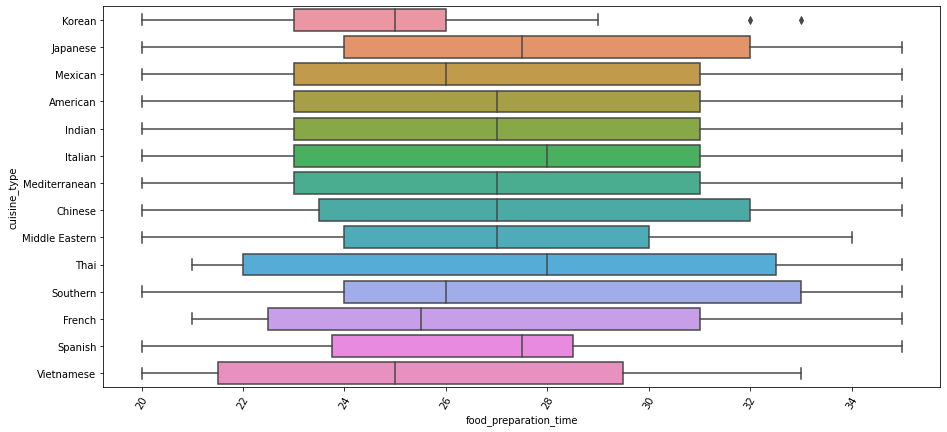

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='food_preparation_time', y='cuisine_type');  
plt.xticks(rotation = 60)
plt.show()

1. Majority (Southern, Thai, Japanese, Chinese, American, Mexican, Indian, Italian and French cuisines) take take equal time (minimum of 20 minutes and a maximum of 35 minutes) to get prepared.
2. Korean cuisines has some outliers.

#### Day of the Week vs Delivery time

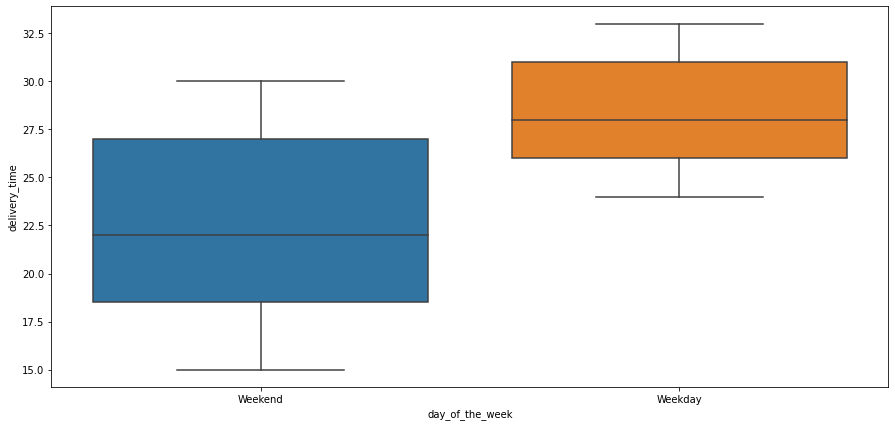

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time');  
plt.show()

Food orders during the week days, take longer time to get delivered (24-33 minutes) compared to weekends (15-30 minutes).

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                     3579.530
The Meatball Shop               2145.210
Blue Ribbon Sushi               1903.950
Blue Ribbon Fried Chicken       1662.290
Parm                            1112.760
RedFarm Broadway                 965.130
RedFarm Hudson                   921.210
TAO                              834.500
Han Dynasty                      755.290
Blue Ribbon Sushi Bar & Grill    666.620
Rubirosa                         660.450
Sushi of Gari 46                 640.870
Nobu Next Door                   623.670
Five Guys Burgers and Fries      506.470
Name: cost_of_the_order, dtype: float64

The top 5 restaurants who receive the highest number of orders, also generate the highest revenue. They are
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

#### Rating vs Delivery time

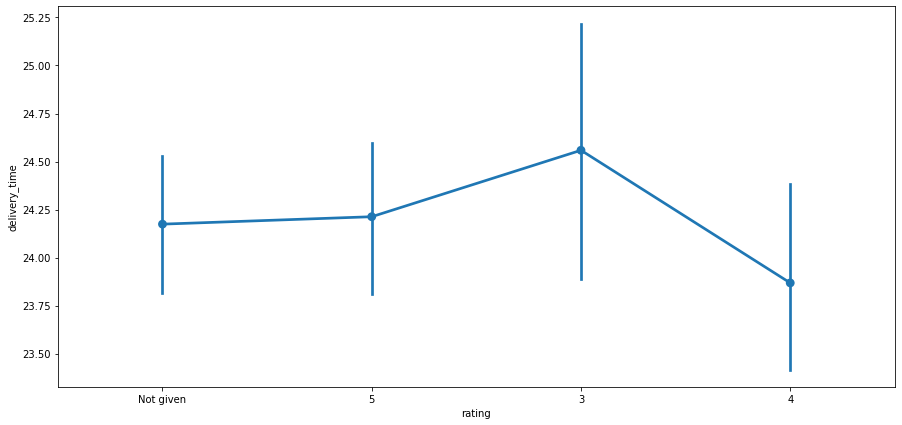

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

1. Orders rated 5, take between 23.79 to 24.60 minutes to get delivered.
2. Orders rated 4, take between 23.30 to 24.30 minutes to get delivered.
3. Orders rated 3, take between 23.85 to 25.25 minutes to get delivered.
4. Orders not rated take between 23.80 to 24.50 minutes to get delivered.

#### Rating vs Food preparation time

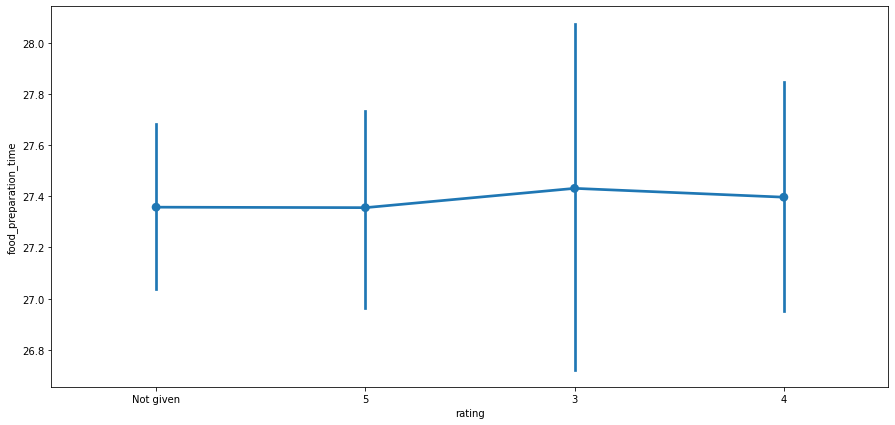

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x='rating', y='food_preparation_time'); 
plt.show()

1. Orders rated 5, take between 27 to 27.75 minutes to get prepared.
2. Orders rated 4, take between 26.85 to 27.85 minutes to get prepared.
3. Orders rated 3, take between 26.80 to 28.20 minutes to get prepared.
4. Orders not rated take between 27.10 to 27.62 minutes to get prepared.

#### Rating vs Cost of the order

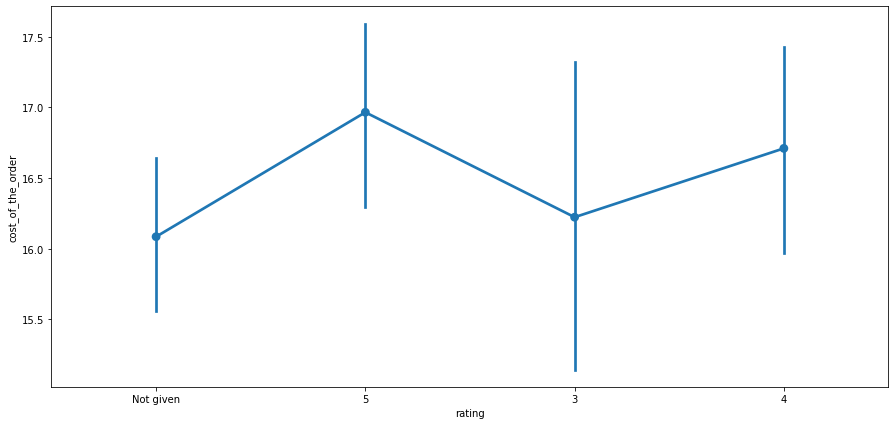

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x='rating', y='cost_of_the_order'); 
plt.show()

The higher the rating the higher the average cost.

1. Orders rated 5, cost between 16.3 to 17.7 dollars, with an average cost of 16.9
2. Orders rated 4, cost between 15.9 to 17.4 dollars, with an average cost of 16.7
3. Orders rated 3, cost between 15.2 to 17.3 dollars, with an average cost of 16.3
4. Orders not rated cost between 15.1 to 16.7 dollars, with an average cost of 16.1



#### Correlation among variables

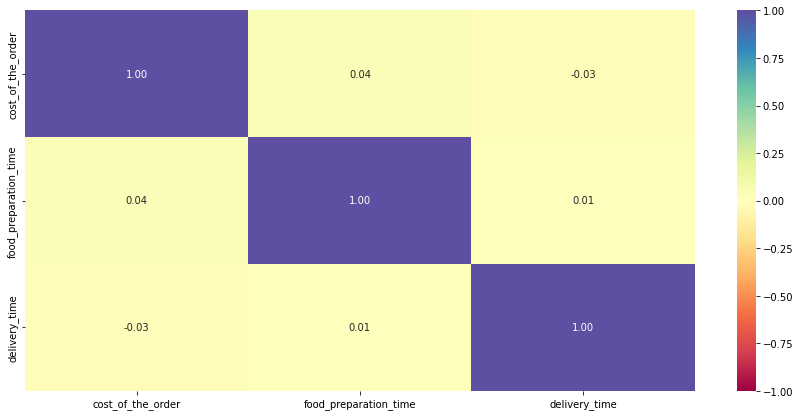

In [ ]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

1. Cost of order and food preparation time have 4% correlation
2. Cost of order and delivery time is negatively correlated.
2. Food preparation time and delivery time have 1% correlation
3. Cost of order and delivery time are negatively correlated.

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50] ['restaurant_name'] 

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 


,restaurant_name,rating
0,The Meatball Shop,4.512
1,Blue Ribbon Fried Chicken,4.328
2,Shake Shack,4.278
3,Blue Ribbon Sushi,4.219


The restaurants qualified to get the promotional offer are:
1. The Meatball Shop
2. Blue Ribbon Fried Chicken
3. Shake Shack
4. Blue Ribbon Sushi

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,7.688
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,1.812
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,1.835
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,7.300
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,1.738


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() 
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

## Percentage of orders that have more than 60 minutes of total delivery time
time_60min = df[df['total_time']>60]
print('There are', time_60min.shape[0], 'orders that take more than 60 minutes to get delivered')
percentage = (time_60min.shape[0]/df.shape[0])*100
print("The percentage of orders that take more than 60 minutes to get delivered is:", round(percentage, 2), '%')

There are 200 orders that take more than 60 minutes to get delivered
The percentage of orders that take more than 60 minutes to get delivered is: 10.54 %


In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,7.688,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,1.812,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,1.835,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,7.300,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,1.738,49


In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations

### Conclusions:
1. American cuisines are the most ordered and most popular cuisine types
2. Vietnamese cuisines are the least ordered and least popular cuisine types
3. Restaurants get more orders during the weekend than during the week days
4. Food orders with high ratings, cost higher compared to those with low ratings.
5. Food orders that took a longer delivery time were rated low


### Recommendations:
1. Restaurants should inculcate more of American cuisines into their menu, as it is the most purchased cuisine
2. In order to enhance a good customer experience, delivery time during the weekdays should be swift. This will appeal more to the lifestyle of the target market (students and busy professionals) and increase the feedback rating of the delivery time.

---